#Import Dataset

In [ ]:
# Upload file dari komputer lokal
from google.colab import files
uploaded = files.upload()

# Setelah file terupload, baca dengan pandas
import pandas as pd
import io

# Misalkan file yang diupload bernama 'diabetes.csv'
df = pd.read_csv('diabetes.csv')
print(df.head())


Saving diabetes.csv to diabetes.csv
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


#Eksplorasi Data Awal

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Statistik Deskriptif:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.10

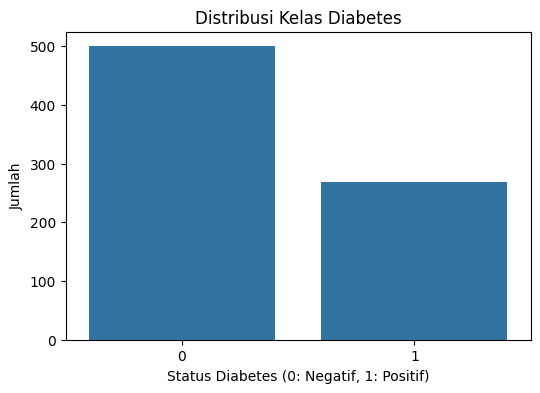

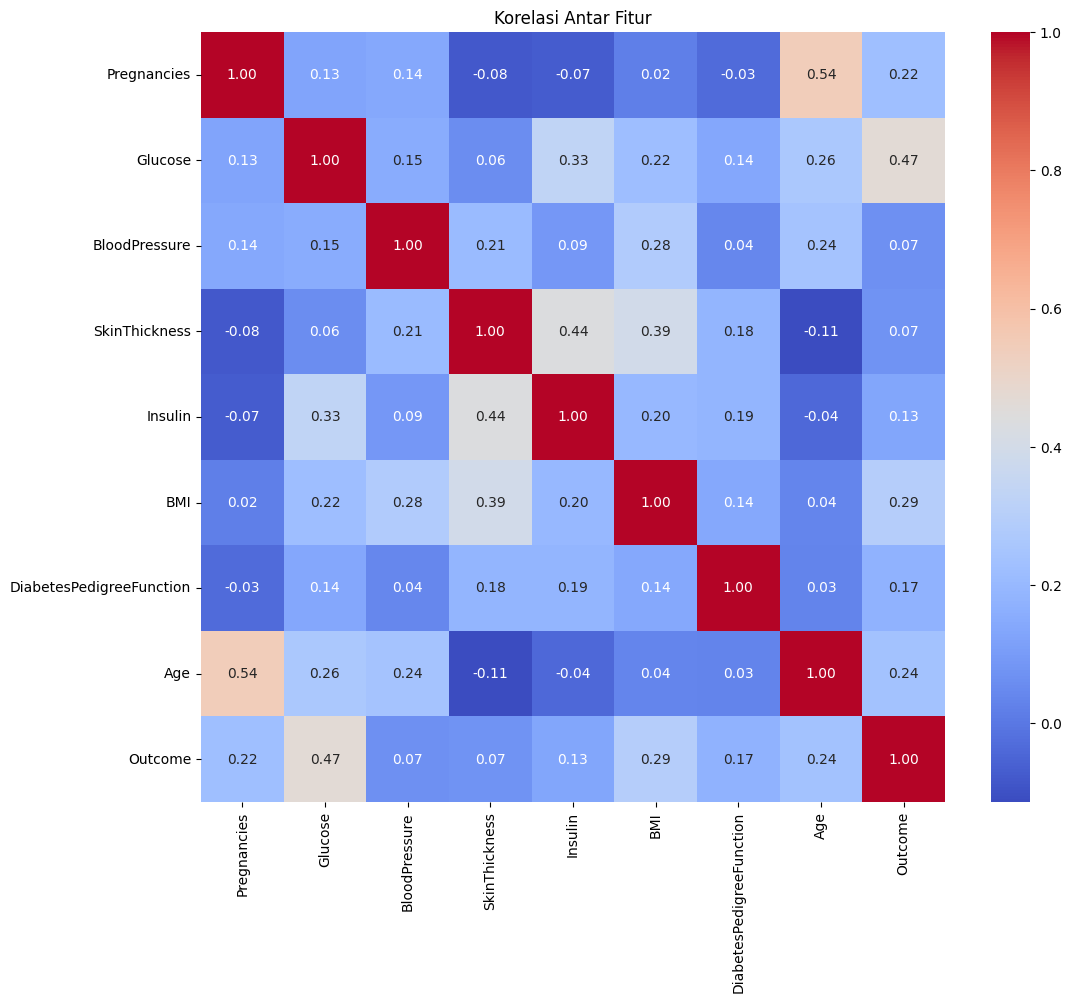

In [ ]:
# Melihat informasi dasar dataset
print("Informasi Dataset:")
print(df.info())

# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Cek missing values (nilai 0 pada kolom tertentu mungkin merupakan missing values)
print("\nJumlah nilai 0 pada setiap kolom:")
for column in df.columns:
    print(f"{column}: {(df[column] == 0).sum()}")

# Visualisasi distribusi kelas
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribusi Kelas Diabetes')
plt.xlabel('Status Diabetes (0: Negatif, 1: Positif)')
plt.ylabel('Jumlah')
plt.show()

# Melihat korelasi antar fitur
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur')
plt.show()

**Data Preprocessing**

In [ ]:
# 1. Penanganan missing values (nilai 0 yang tidak valid)
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Mengganti nilai 0 dengan mean dari masing-masing kolom
for column in columns_to_fix:
    mean_value = df[df[column] != 0][column].mean()
    df[column] = df[column].replace(0, mean_value)

print("Data setelah penanganan missing values:")
print(df.describe())

# 2. Memisahkan fitur dan target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 3. Normalisasi data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

print("\nData setelah normalisasi:")
print(X_normalized.head())

# 4. Penanganan outlier menggunakan metode IQR
for column in X_normalized.columns:
    Q1 = X_normalized[column].quantile(0.25)
    Q3 = X_normalized[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clipping nilai outlier
    X_normalized[column] = X_normalized[column].clip(lower=lower_bound, upper=upper_bound)

print("\nData setelah penanganan outlier:")
print(X_normalized.head())

Data setelah penanganan missing values:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.4769

#Pembagian Data Training dan Testing

In [ ]:
# Membagi data menjadi training dan testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])

Jumlah data training: 614
Jumlah data testing: 154


#Implementasi Algoritma K-NN dan Pencarian K Optimal

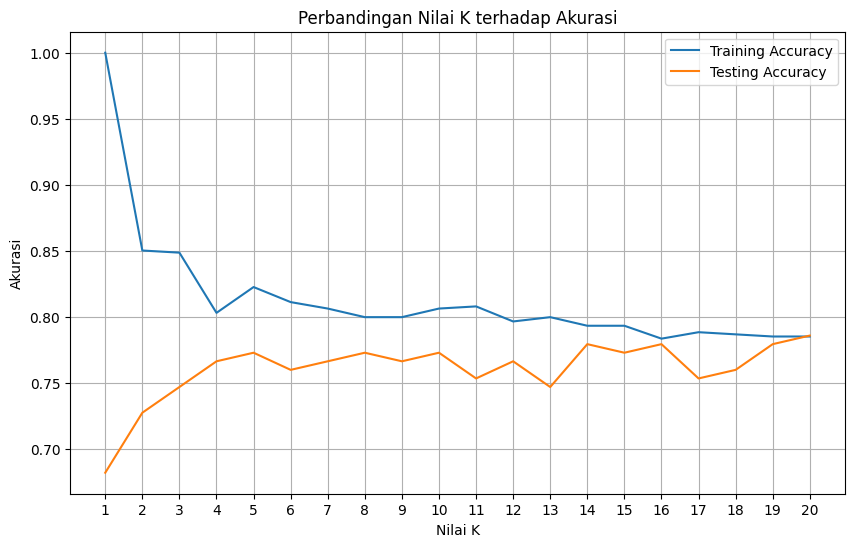

Nilai K optimal: 20
Akurasi tertinggi pada data testing: 0.7857


In [ ]:
# Mengimplementasikan algoritma K-NN dengan berbagai nilai K
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

k_values = range(1, 21)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Evaluasi pada data training
    y_train_pred = knn.predict(X_train)
    train_scores.append(accuracy_score(y_train, y_train_pred))

    # Evaluasi pada data testing
    y_test_pred = knn.predict(X_test)
    test_scores.append(accuracy_score(y_test, y_test_pred))

# Visualisasi perbandingan nilai K terhadap akurasi
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, label='Training Accuracy')
plt.plot(k_values, test_scores, label='Testing Accuracy')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.title('Perbandingan Nilai K terhadap Akurasi')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Menentukan nilai K optimal
optimal_k = k_values[np.argmax(test_scores)]
print(f"Nilai K optimal: {optimal_k}")
print(f"Akurasi tertinggi pada data testing: {max(test_scores):.4f}")

#Implementasi Model K-NN dengan K Optimal

In [ ]:
# Implementasi model K-NN dengan nilai K optimal
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred = knn_optimal.predict(X_test)

#Evaluasi Model

--- Evaluasi Model dengan K Optimal ---
Akurasi: 0.7857
Presisi: 0.7500
Recall: 0.6000
F1-score: 0.6667


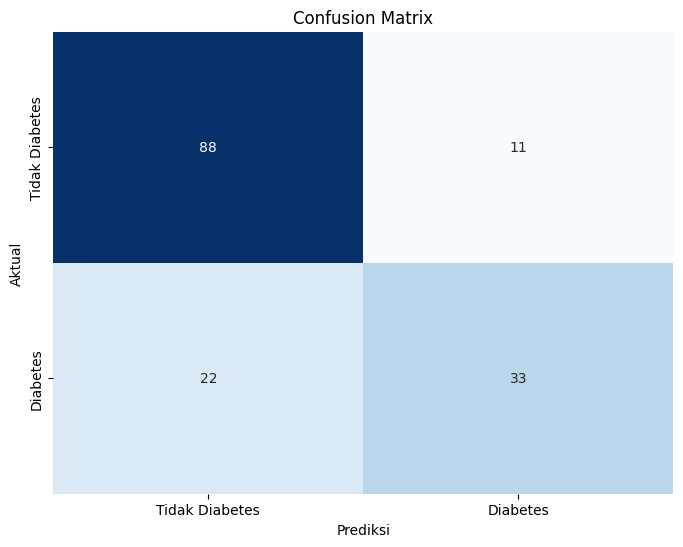


Classification Report:
                precision    recall  f1-score   support

Tidak Diabetes       0.80      0.89      0.84        99
      Diabetes       0.75      0.60      0.67        55

      accuracy                           0.79       154
     macro avg       0.78      0.74      0.75       154
  weighted avg       0.78      0.79      0.78       154



In [ ]:
# Evaluasi performa model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

print("--- Evaluasi Model dengan K Optimal ---")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Tidak Diabetes', 'Diabetes'],
            yticklabels=['Tidak Diabetes', 'Diabetes'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Tidak Diabetes', 'Diabetes']))

#Analisis Fitur Penting

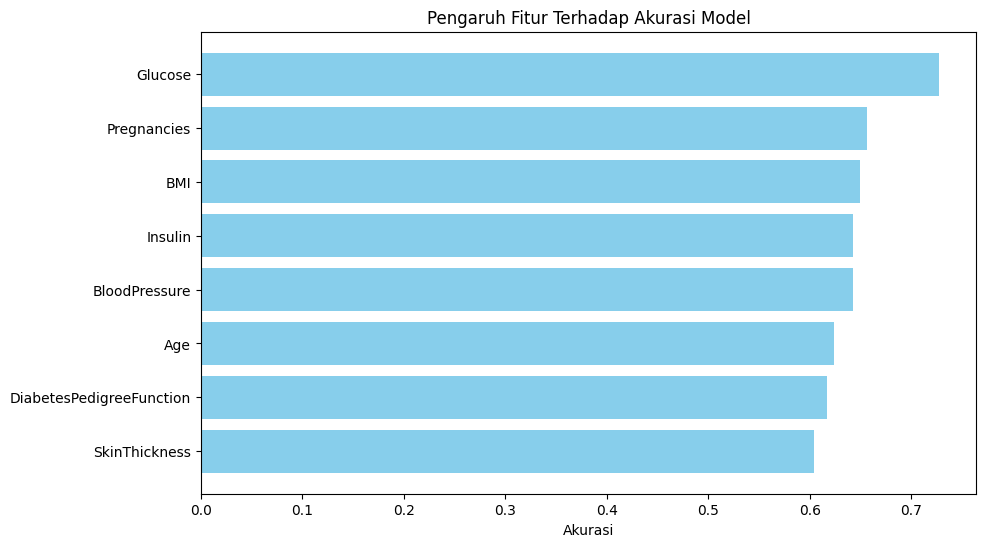


Pengaruh setiap fitur:
Glucose: 0.7273
Pregnancies: 0.6558
BMI: 0.6494
BloodPressure: 0.6429
Insulin: 0.6429
Age: 0.6234
DiabetesPedigreeFunction: 0.6169
SkinThickness: 0.6039


In [ ]:
# Analisis fitur penting
feature_importance = {}
for feature in X.columns:
    X_single_feature = X_normalized[[feature]]
    X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(X_single_feature, y, test_size=0.2, random_state=42)

    knn_sf = KNeighborsClassifier(n_neighbors=optimal_k)
    knn_sf.fit(X_train_sf, y_train_sf)
    y_pred_sf = knn_sf.predict(X_test_sf)

    acc = accuracy_score(y_test_sf, y_pred_sf)
    feature_importance[feature] = acc

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
features = list(feature_importance.keys())
importances = list(feature_importance.values())
indices = np.argsort(importances)

plt.barh(range(len(indices)), [importances[i] for i in indices], color='skyblue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Akurasi')
plt.title('Pengaruh Fitur Terhadap Akurasi Model')
plt.show()

print("\nPengaruh setiap fitur:")
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")

#Menyimpan Model

In [ ]:
# Menyimpan model untuk penggunaan di masa depan
import pickle

# Simpan model
with open('diabetes_knn_model.pkl', 'wb') as file:
    pickle.dump(knn_optimal, file)

# Simpan scaler
with open('diabetes_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Model dan scaler berhasil disimpan!")

# Download model dan scaler ke komputer lokal
from google.colab import files
files.download('diabetes_knn_model.pkl')
files.download('diabetes_scaler.pkl')

Model dan scaler berhasil disimpan!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Uji Model dengan Data Baru

In [ ]:
# Fungsi untuk memprediksi data baru
def predict_diabetes(data, model, scaler):
    # Data harus dalam format yang sesuai dengan fitur model
    # Gunakan scaler yang sama dengan yang digunakan saat training
    data_scaled = scaler.transform([data])
    prediction = model.predict(data_scaled)
    probability = model.predict_proba(data_scaled)

    return prediction[0], probability[0]

# Contoh penggunaan
# Urutan fitur: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
new_patient = [6, 148, 72, 35, 0, 33.6, 0.627, 50]

# Load model
with open('diabetes_knn_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Load scaler
with open('diabetes_scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

# Prediksi
prediction, probability = predict_diabetes(new_patient, loaded_model, loaded_scaler)

print(f"Prediksi: {'Diabetes' if prediction == 1 else 'Tidak Diabetes'}")
print(f"Probabilitas: Tidak Diabetes = {probability[0]:.4f}, Diabetes = {probability[1]:.4f}")

Prediksi: Diabetes
Probabilitas: Tidak Diabetes = 0.3500, Diabetes = 0.6500


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#Visualisasi Prediksi

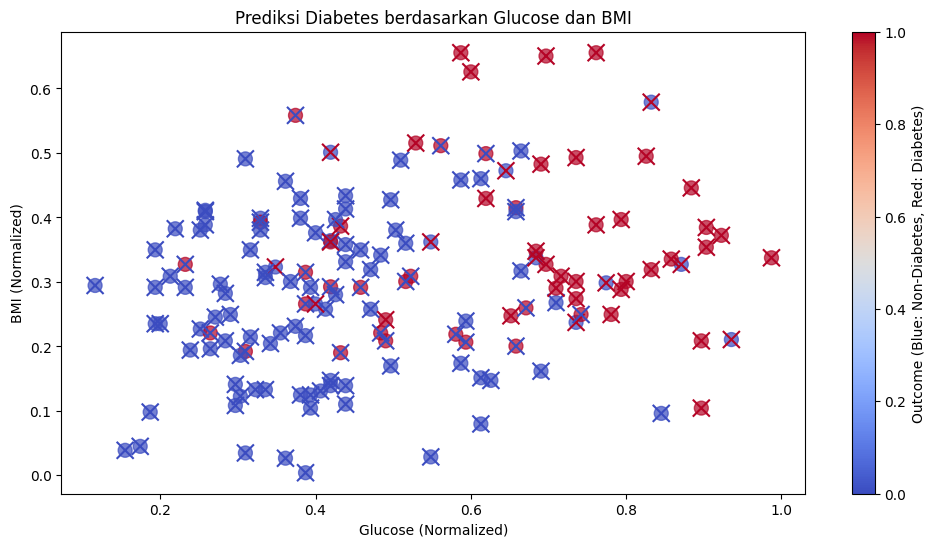

In [ ]:
# Visualisasi prediksi berdasarkan 2 fitur penting (misalnya Glucose dan BMI)
plt.figure(figsize=(12, 6))
plt.scatter(X_test.iloc[:, 1], X_test.iloc[:, 5], c=y_test, cmap='coolwarm', alpha=0.7, s=100)
plt.scatter(X_test.iloc[:, 1], X_test.iloc[:, 5], c=y_pred, cmap='coolwarm', marker='x', alpha=1, s=150)
plt.xlabel('Glucose (Normalized)')
plt.ylabel('BMI (Normalized)')
plt.title('Prediksi Diabetes berdasarkan Glucose dan BMI')
plt.colorbar(label='Outcome (Blue: Non-Diabetes, Red: Diabetes)')
plt.show()

#Cross-Validation

In [ ]:
# Implementasi cross-validation untuk evaluasi yang lebih robust
from sklearn.model_selection import cross_val_score, KFold

# Menentukan jumlah fold untuk cross-validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

# Melakukan cross-validation
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=optimal_k),
                           X_normalized, y, cv=k_fold, scoring='accuracy')

print(f"CV Scores untuk setiap fold: {cv_scores}")
print(f"CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

CV Scores untuk setiap fold: [0.72727273 0.80519481 0.74025974 0.79220779 0.80519481 0.68831169
 0.77922078 0.75324675 0.72368421 0.75      ]
CV Accuracy: 0.7565 ± 0.0366


#Grid Search untuk Optimasi Parameter

In [ ]:
# Grid Search untuk optimasi parameter KNN secara mendalam
from sklearn.model_selection import GridSearchCV

# Parameter yang akan diuji
param_grid = {
    'n_neighbors': range(1, 31, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # p=1 untuk manhattan, p=2 untuk euclidean
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Gunakan semua core CPU yang tersedia
)

# Lakukan grid search
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)
print("Accuracy terbaik:", grid_search.best_score_)

# Gunakan model dengan parameter terbaik
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)

# Evaluasi model dengan parameter terbaik
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Akurasi dengan parameter terbaik: {accuracy_best:.4f}")

Parameter terbaik: {'metric': 'manhattan', 'n_neighbors': 19, 'p': 1, 'weights': 'distance'}
Accuracy terbaik: 0.7703851792616286
Akurasi dengan parameter terbaik: 0.7468
